# Do some nice plots with pandas

In [1]:
import pandas as pd

In [3]:
# to make plots to appear in the notebook 'inline'
%matplotlib inline

In [4]:
safi = pd.read_csv("data/SAFI_full_shortname.csv")

In [5]:
safi.head()

,key_id,interview_date,quest_no,start,end,province,district,ward,village,years_farm,...,items_owned,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID
0,1,17 November 2016,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Manica,Manica,Bandula,God,11,...,['bicycle' ; 'television' ; 'solar_panel' ; ...,NaN,2,['Jan'],['na' ; 'rely_less_food' ; 'reduce_meals' ; ...,-19.112259,33.483456,698,14.0,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,2,17 November 2016,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,God,2,...,['cow_cart' ; 'bicycle' ; 'radio' ; 'cow_pl...,NaN,2,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112477,33.483416,690,19.0,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,3,17 November 2016,3,2017-04-02T14:35:26.000Z,2017-04-02T17:26:53.000Z,Manica,Manica,Bandula,God,40,...,['solar_torch'],NaN,2,['Jan' ; 'Feb' ; 'Mar' ; 'Oct' ; 'Nov' ; ...,['na' ; 'restrict_adults' ; 'lab_ex_food'],-19.112108,33.483450,674,13.0,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,4,17 November 2016,4,2017-04-02T14:55:18.000Z,2017-04-02T17:27:16.000Z,Manica,Manica,Bandula,God,6,...,['bicycle' ; 'radio' ; 'cow_plough' ; 'sola...,NaN,2,['Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112229,33.483424,679,5.0,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,5,17 November 2016,5,2017-04-02T15:10:35.000Z,2017-04-02T17:27:35.000Z,Manica,Manica,Bandula,God,18,...,['motorcyle' ; 'radio' ; 'cow_plough' ; 'mo...,NaN,2,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['na' ; 'go_forest' ; 'migrate'],-19.112217,33.483425,689,10.0,uuid:2c867811-9696-4966-9866-f35c3e97d02d


# Plot a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1210876d8>]],
      dtype=object)

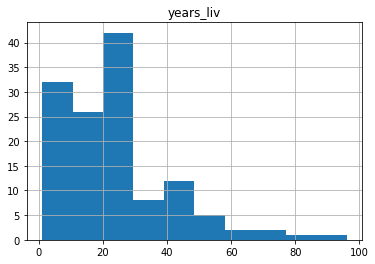

In [6]:
safi.hist(column="years_liv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12160cd30>]],
      dtype=object)

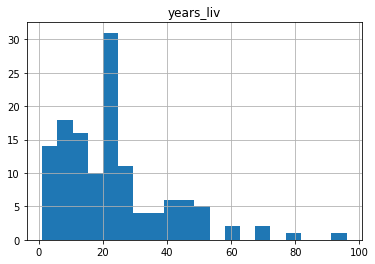

In [7]:
safi.hist(column="years_liv", bins=20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f668400>,
      dtype=object)

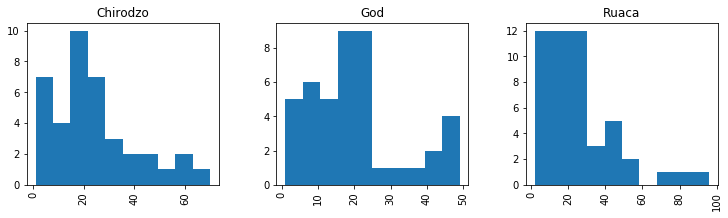

In [6]:
# plot one histogram per village, give it a layout of 1 row and 3 columns (i.e. all 3 plots next to each other),
# and set the size of the figure 
# you can change the numbers to see what happens
safi.hist(column='years_liv', by="village", layout = (1,3),
         figsize=(12,3))

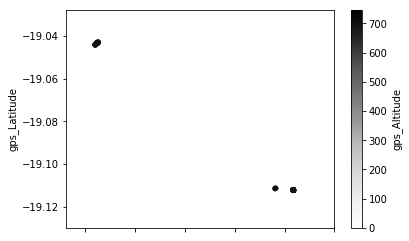

In [7]:
# scatter plot
# plot the gps locations and represent the altitude with different colors
safi.plot.scatter(x="gps_Longitude", y="gps_Latitude", c="gps_Altitude")

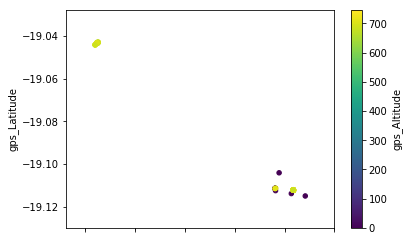

In [10]:
# change the colormap (the colors of altitude) to 'viridis' (you can also try our 'jet' or 'Reds')
# read more about colormaps https://matplotlib.org/users/colormaps.html
safi.plot.scatter(x='gps_Longitude', y='gps_Latitude', c='gps_Altitude', colormap='viridis')

# %load code/plots.py
1. Make a scatter plot of 'years_farm' vs 'years_liv' and color the points by 'buildings_in_compound'

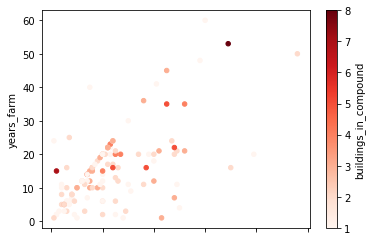

In [19]:
safi.plot.scatter(x = 'years_liv', y = 'years_farm', c = 'buildings_in_compound', colormap = 'Reds')

2. Make a bar plot of the mean number of rooms per wall type
    - note!: first we need to calculate the mean value for rooms per wall type (groupby)

In [18]:
# means of rooms per walltype
rooms_mean = safi.groupby('respondent_wall_type').mean()['rooms']
rooms_mean.head()

respondent_wall_type
burntbricks    2.104478
cement         3.000000
muddaub        1.260870
sunbricks      1.529412
Name: rooms, dtype: float64

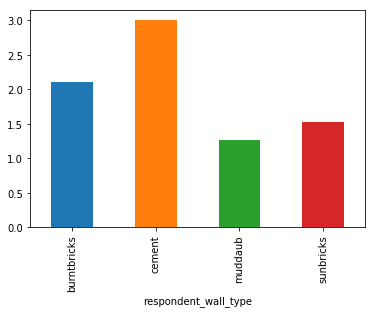

In [19]:
# barplot?
rooms_mean.plot.bar()

3. Try plotting mean rooms per wall and roof type pairs

In [33]:
# mean of rooms per walltype and rooftype
rooms_means2 = safi.groupby(['respondent_wall_type', 'respondent_roof_type']).mean()['rooms']
rooms_means2.head()

respondent_wall_type  respondent_roof_type
burntbricks           grass                   1.681818
                      mabatipitched           2.166667
                      mabatisloping           2.333333
cement                mabatisloping           3.000000
muddaub               grass                   1.214286
Name: rooms, dtype: float64

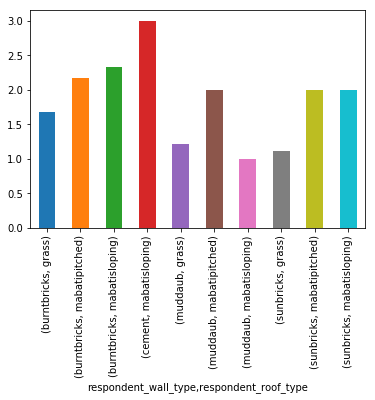

In [34]:
rooms_means2.plot.bar()